# PREDICTING WHETHER A PERSON EARNS <=50K OR >50K



## I) PROBLEM DEFINITION  

> Given a list of features, We are tasked with predicting whether a person earn less than or equal to 50K or greater than 50k.

## II) FEATURES

   **Create a data dictionary**
   1. age: continuous.
   2. workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-         worked.
   3. fnlwgt: continuous.
   4. education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th,         Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
   5. education-num: continuous.
   6. marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent,             Married-AF-spouse.
   7. occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-           cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-         serv, Armed-Forces.
   8. relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
   9. race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
   10. sex: Female, Male.
   11. capital-gain: continuous.
   12. capital-loss: continuous.
   13. hours-per-week: continuous.
   14. native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc),         India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam,             Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary,             Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-             Netherlands.


In [1]:
#import basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 
%matplotlib inline
import re

**Following scikit learn model map, we would be using the algorithms below**

In [2]:
# libraries required for data preparation and modelling
from sklearn.svm import LinearSVC,SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import *

**The below will be used for model Evaluation**

In [3]:
from sklearn.model_selection import cross_val_score,GridSearchCV,StratifiedKFold
from sklearn.model_selection import train_test_split,RandomizedSearchCV
#from sklearn.metrics import 

### LOAD DATA

In [4]:
#Import data 
data = pd.read_csv('adult.data')

In [5]:
data.head()

,age,work_class,fnlgwt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
data.tail()

,age,work_class,fnlgwt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,target
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [7]:
print('The len of the data is %d'%(len(data)))
print('The number of features in the data is %s'%(data.shape[1]))

The len of the data is 32561
The number of features in the data is 15


1. Age,capital_gain,capital_loss,hours_per_week is a continous variable
2. Education,Education_num is an ordinal variable
3. marital_status,work_class,occupation,relationship,race,sex,native_country is a categorical    variable
4. Target is a dependent Varibale
5. fnlgwt is a unique_id variable

In [8]:
data.dtypes

age                int64
work_class        object
fnlgwt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
target            object
dtype: object

In [9]:
#First we identify if there are duplicates
data.duplicated().value_counts()
#Then we drop duplicate rows
data = data[~data.duplicated()].reset_index()

#  DATA ANALYSIS BY VISUALIZATION

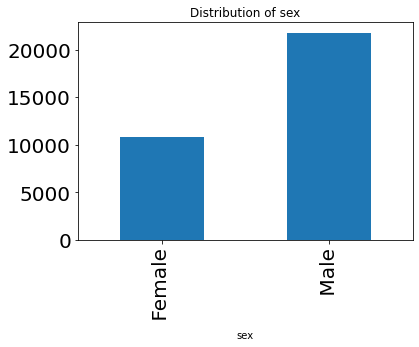

In [10]:
#This shows that a large percentage of male worked than the female gender
groupby_sex = data.groupby('sex').size()
groupby_sex.plot.bar(title ='Distribution of sex');

<AxesSubplot:title={'center':'Distribution of race'}, xlabel='race'>

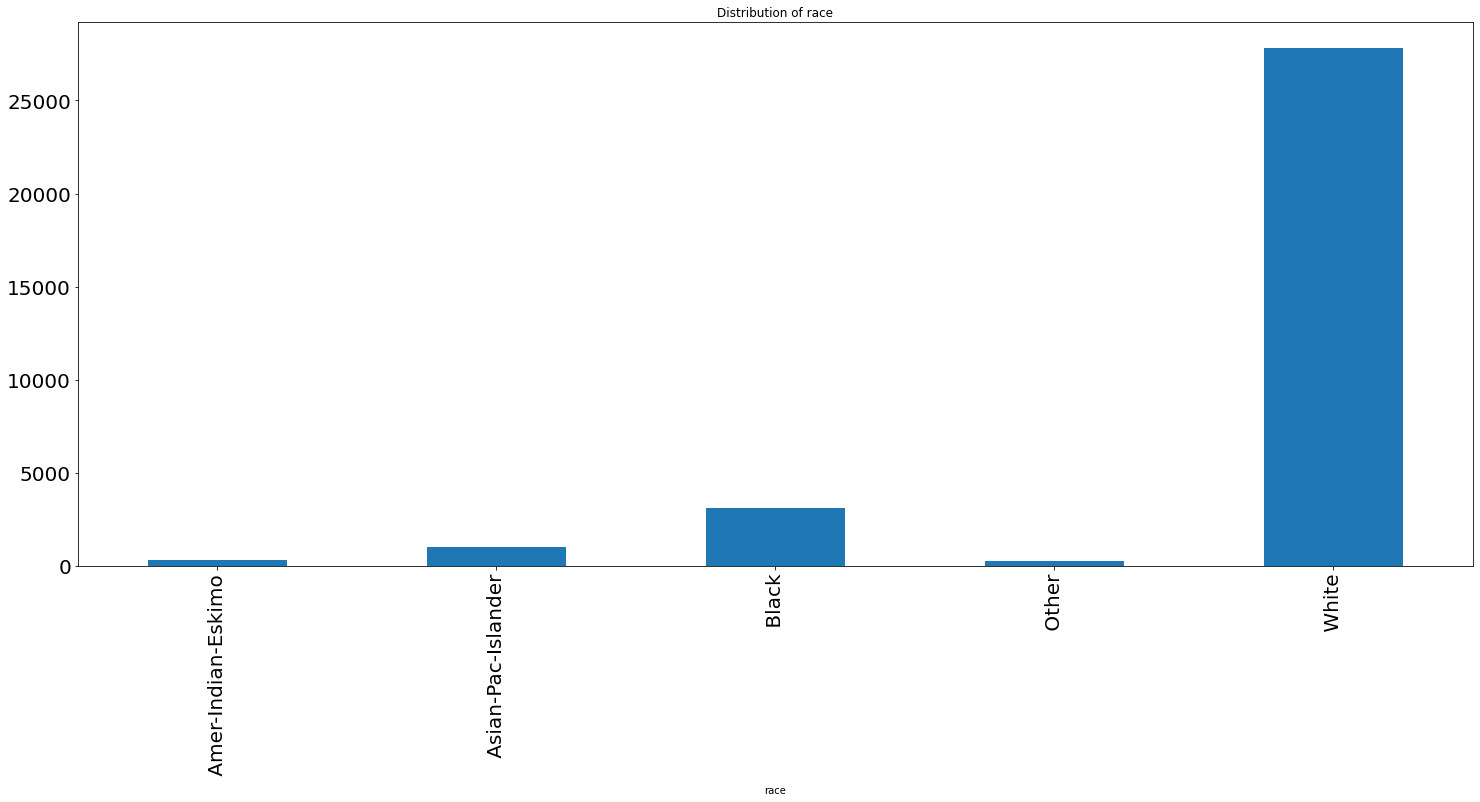

In [11]:
#The white has a large percent earners that ohers, this makes sense since it is a white country
#The black follows since they are the second most populous race in the country
groupby_race = data.groupby('race').size()
plt.figure(figsize=(25,10))
groupby_race.plot.bar(title ='Distribution of race')

<AxesSubplot:title={'center':'Distribution of age'}, xlabel='age'>

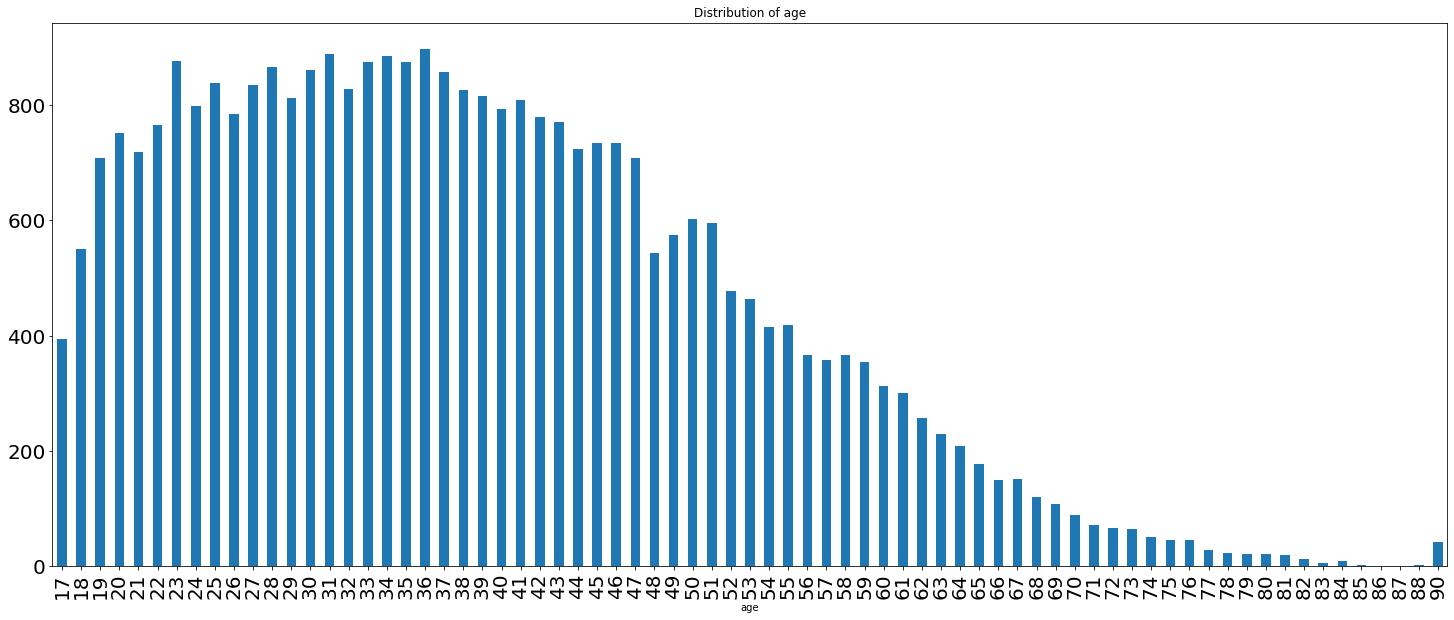

In [12]:
groupby_age = data.groupby('age').size()
plt.figure(figsize=(25,10))
groupby_age.plot.bar(title ='Distribution of age')

<AxesSubplot:title={'center':'Distribution of target for age between 18 and 60'}, xlabel='target'>

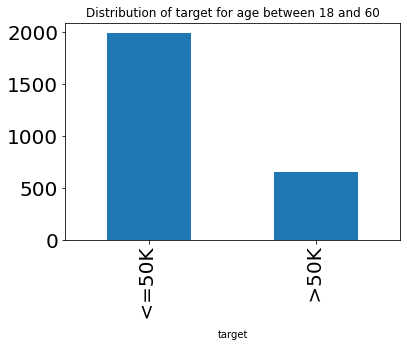

In [13]:
#confirmed that most people that earn below 50k are those between 18 and 60
data_age_18_and_60 = data[(data.age>=18)&(data.age>=60)]
groupby_target_18_and_60 = data_age_18_and_60.groupby('target').size()
groupby_target_18_and_60.plot.bar(title = 'Distribution of target for age between 18 and 60')

<AxesSubplot:title={'center':'Distribution of occupation'}, xlabel='occupation'>

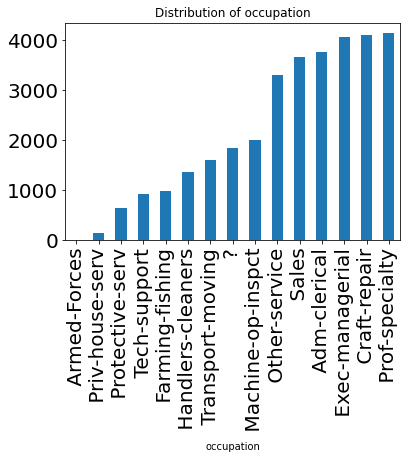

In [14]:
groupby_occ = data.groupby('occupation').size().sort_values()
groupby_occ.plot.bar(title ='Distribution of occupation')

<AxesSubplot:title={'center':'Distribution of marital_status'}, xlabel='marital_status'>

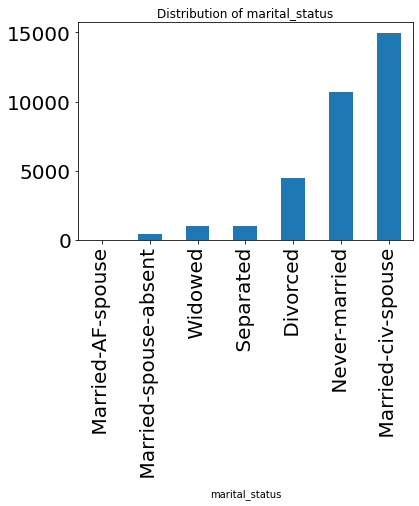

In [15]:
groupby_mar_stats = data.groupby('marital_status').size().sort_values()
groupby_mar_stats.plot.bar(title ='Distribution of marital_status')

<AxesSubplot:title={'center':'Distribution of relationship'}, xlabel='relationship'>

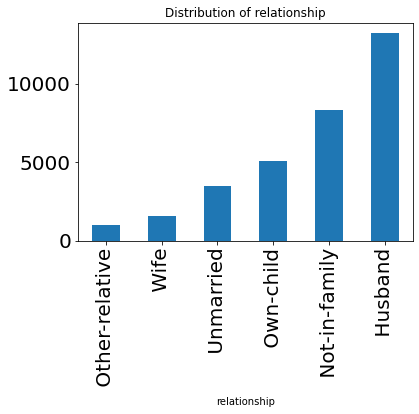

In [16]:
groupby_rel = data.groupby('relationship').size().sort_values()
groupby_rel.plot.bar(title ='Distribution of relationship')

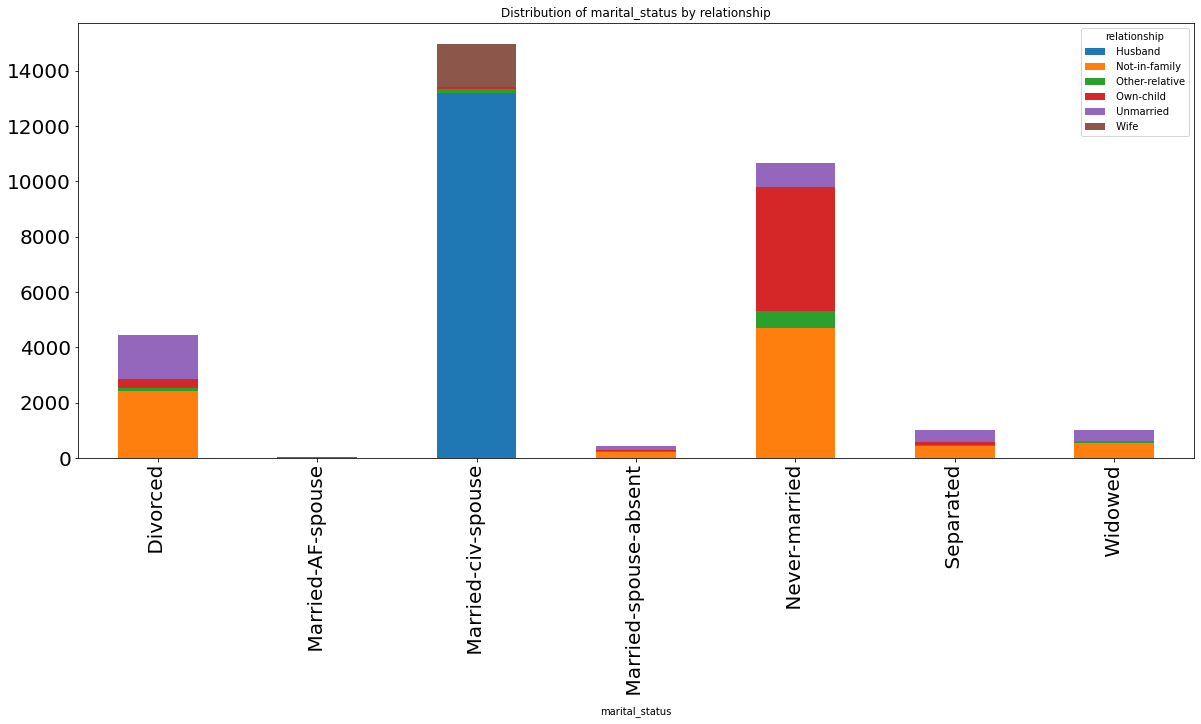

In [17]:
groupby_target_stats = data.groupby(['marital_status', 'relationship'])['marital_status'].count().unstack('relationship')
groupby_target_stats.plot.bar(title ='Distribution of marital_status by relationship', stacked=True, figsize = (20,8));

<AxesSubplot:title={'center':'Distribution of native_country'}, xlabel='native_country'>

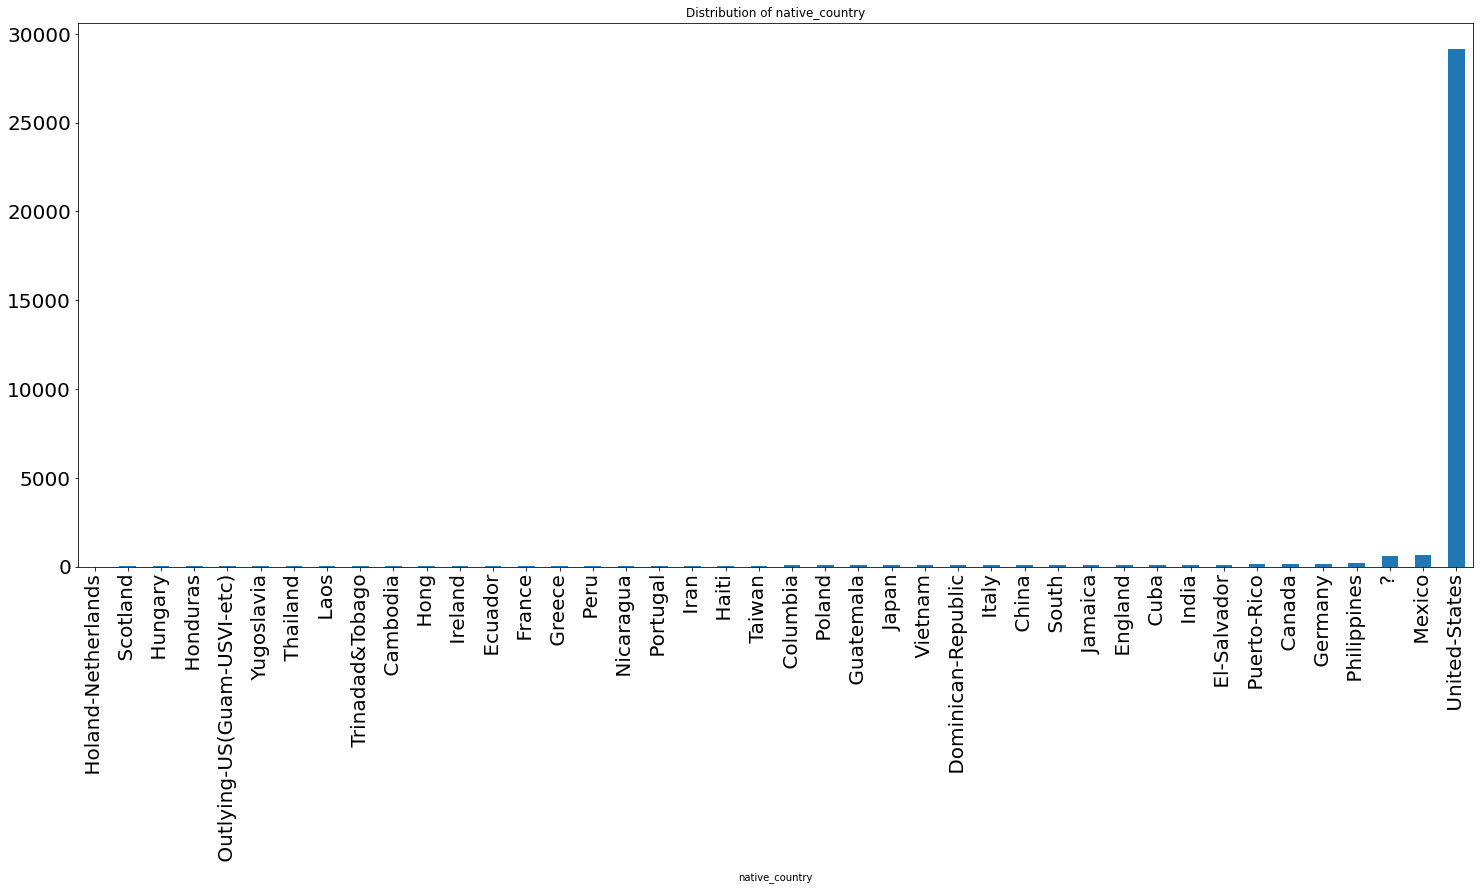

In [18]:
groupby_nat_country = data.groupby('native_country').size().sort_values()
plt.figure(figsize=(25,10))
groupby_nat_country.plot.bar(title ='Distribution of native_country')

<AxesSubplot:title={'center':'Distribution of races for the united states'}, xlabel='race'>

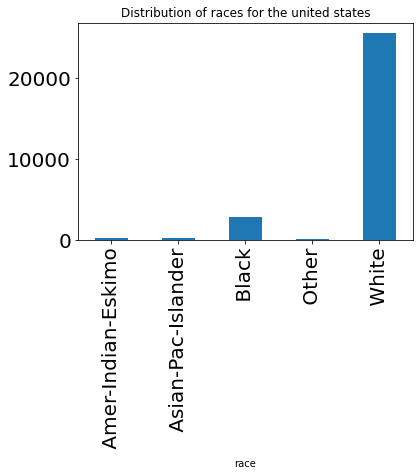

In [19]:
#confirmed that most people that stay in united states are white race, followed by black race
data_country_unitedstate = data[(data.native_country ==' United-States')]
groupby_unitedstates_race = data_country_unitedstate.groupby('race').size()
groupby_unitedstates_race.plot.bar(title = 'Distribution of races for the united states')

<AxesSubplot:title={'center':'Distribution of hours_per_week'}, xlabel='hours_per_week'>

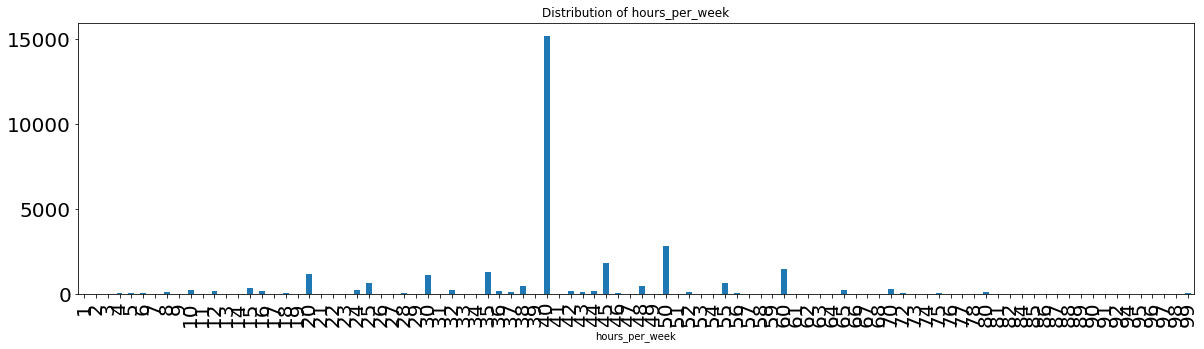

In [20]:
groupby_hours_per_week = data.groupby('hours_per_week').size()
plt.figure(figsize=(20,5))
groupby_hours_per_week.plot.bar(title ='Distribution of hours_per_week')

<AxesSubplot:title={'center':'Distribution of target for 40 hours per week'}, xlabel='target'>

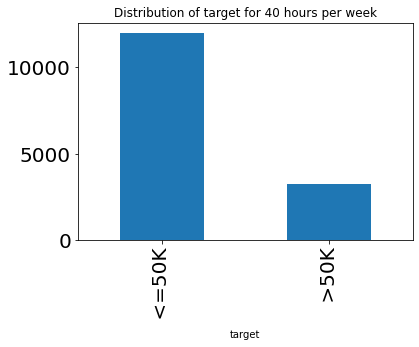

In [21]:
#Confirming that most people that work 40 hours per week earn below 50k 
data_40_hours_per_week = data[(data.hours_per_week == 40)]
groupby_target_40_hours_per_week = data_40_hours_per_week.groupby('target').size()
groupby_target_40_hours_per_week.plot.bar(title = 'Distribution of target for 40 hours per week')

<AxesSubplot:title={'center':'Distribution of gender for 40 hours per week'}, xlabel='sex'>

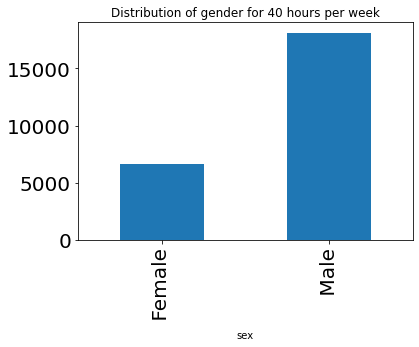

In [22]:
#Confirming that most people that work greater than or equal 40 hours per week  are mostly males
data_40_hours_per_week = data[(data.hours_per_week >= 40)]
groupby_gender_40_hours_per_week = data_40_hours_per_week.groupby('sex').size()
groupby_gender_40_hours_per_week.plot.bar(title = 'Distribution of gender for 40 hours per week')

<AxesSubplot:title={'center':'Distribution of capital_gain'}, xlabel='capital_gain'>

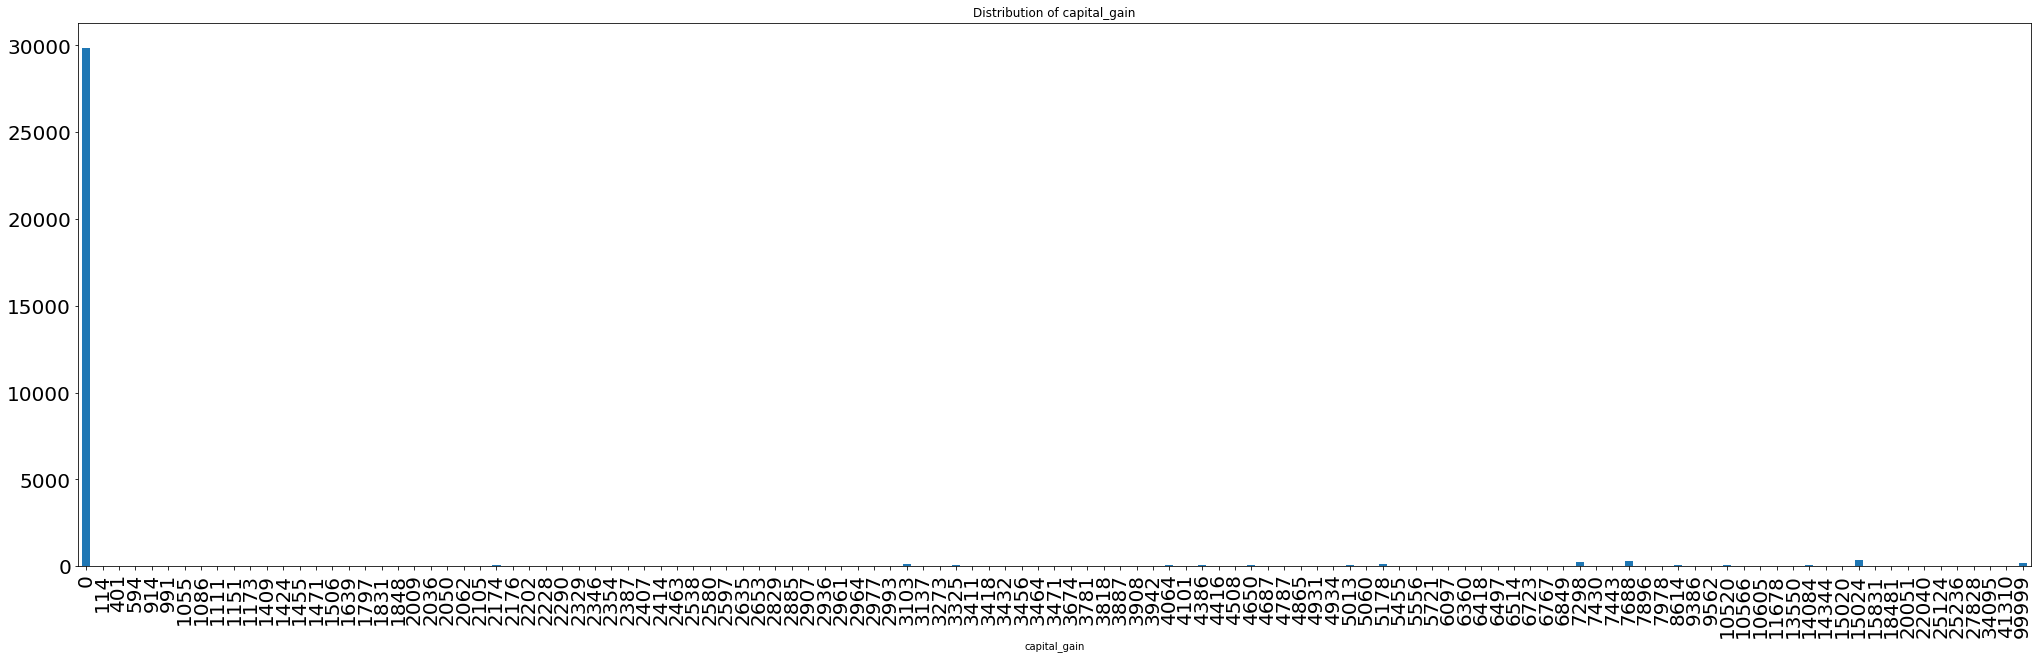

In [23]:
groupby_capital_gain = data.groupby('capital_gain').size()
plt.figure(figsize=(35,10))
groupby_capital_gain.plot.bar(title ='Distribution of capital_gain')

<AxesSubplot:title={'center':'Distribution of capital_loss'}, xlabel='capital_loss'>

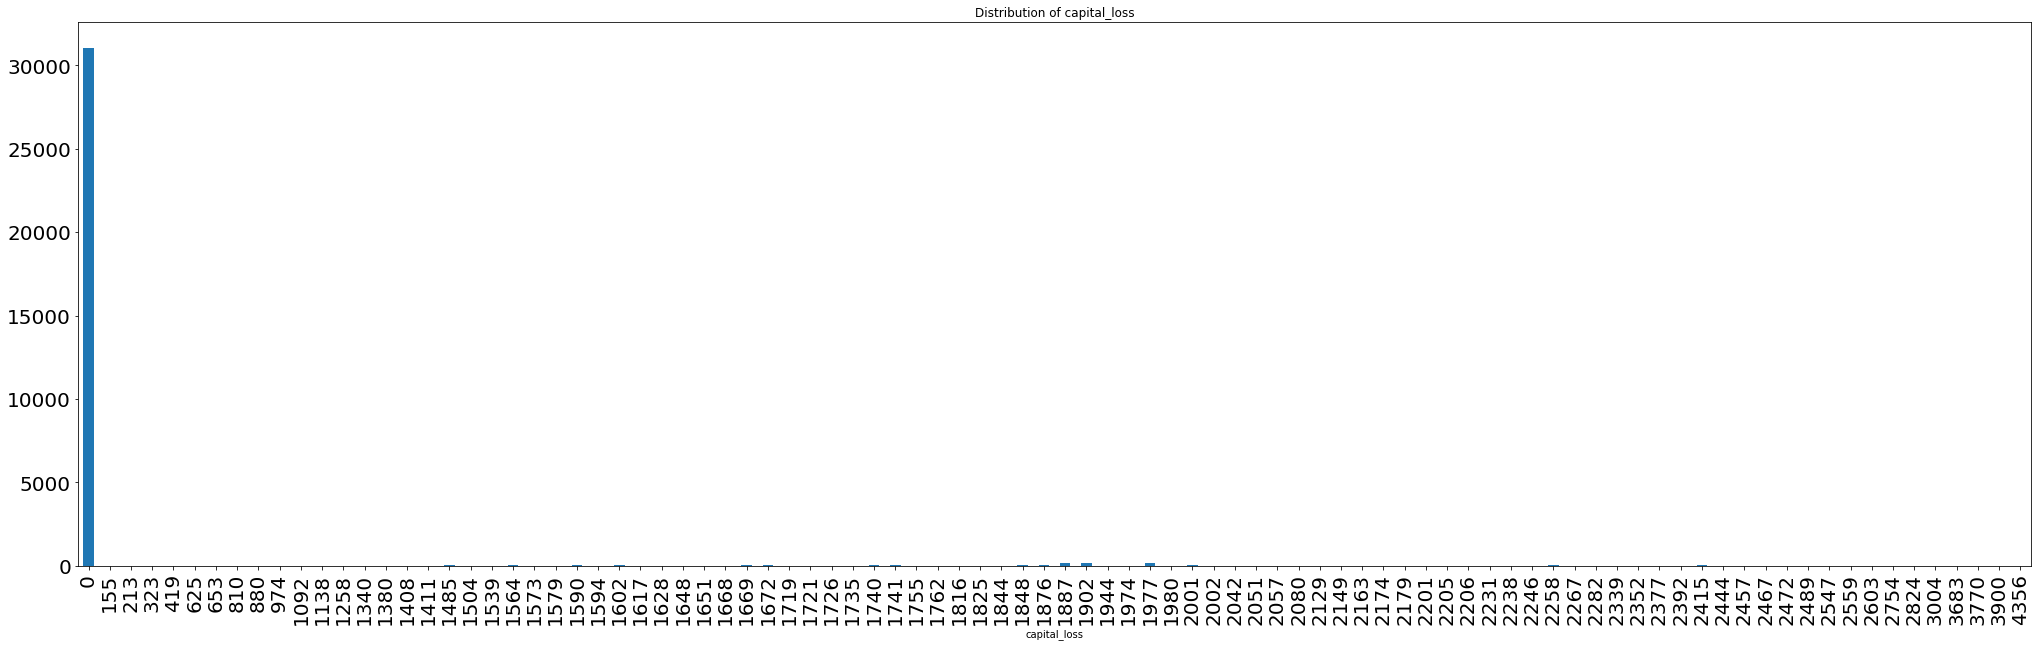

In [24]:
groupby_capital_loss = data.groupby('capital_loss').size()
plt.figure(figsize=(35,10))
groupby_capital_loss.plot.bar(title ='Distribution of capital_loss')

<AxesSubplot:title={'center':'Distribution of work_class'}, xlabel='work_class'>

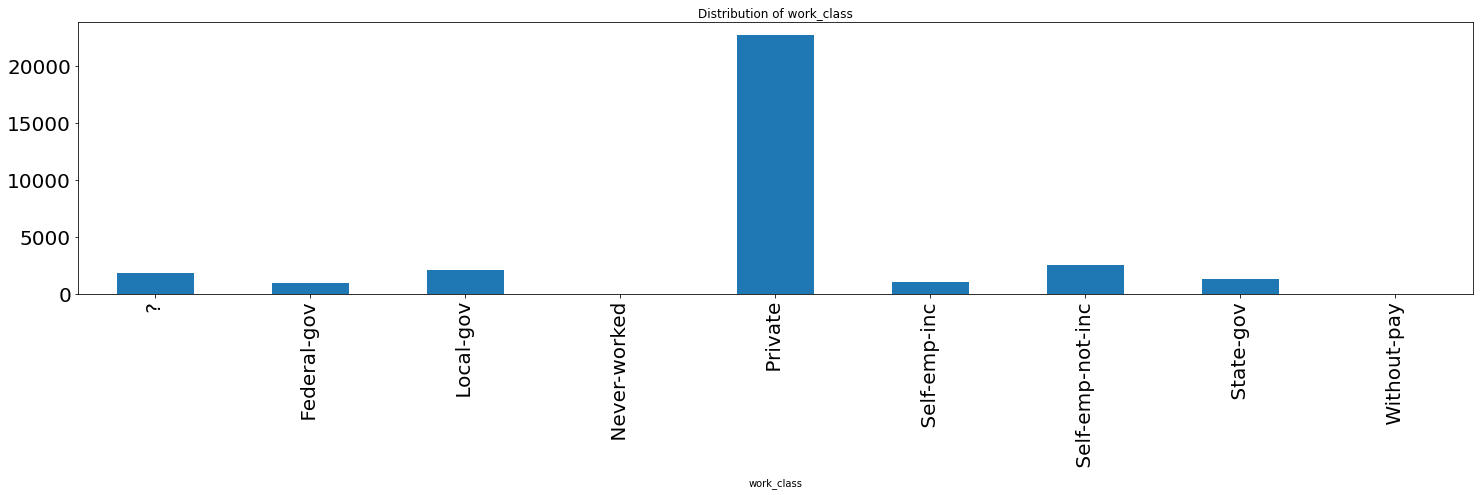

In [25]:
#Most earner worked privately
groupby_work_class = data.groupby('work_class').size()
plt.figure(figsize=(25,5))
groupby_work_class.plot.bar(title ='Distribution of work_class')

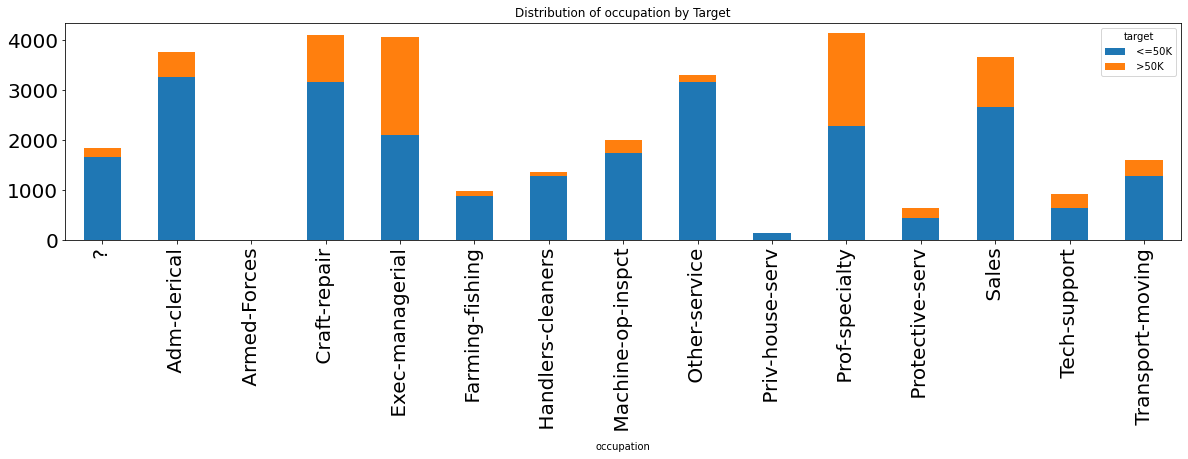

In [26]:
groupby_target_occ = data.groupby(['occupation', 'target'])['occupation'].count().unstack('target')
groupby_target_occ.plot.bar(title ='Distribution of occupation by Target', stacked=True, figsize = (20,4));

In [27]:
data.work_class.value_counts()

 Private             22673
 Self-emp-not-inc     2540
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: work_class, dtype: int64

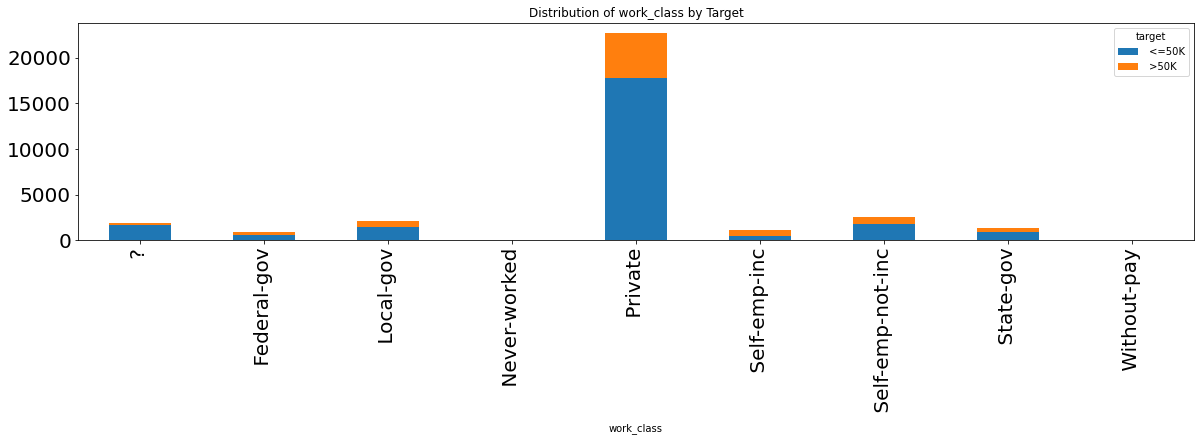

In [28]:
groupby_target_occ = data.groupby(['work_class', 'target'])['work_class'].count().unstack('target')
groupby_target_occ.plot.bar(title ='Distribution of work_class by Target', stacked=True, figsize = (20,4));

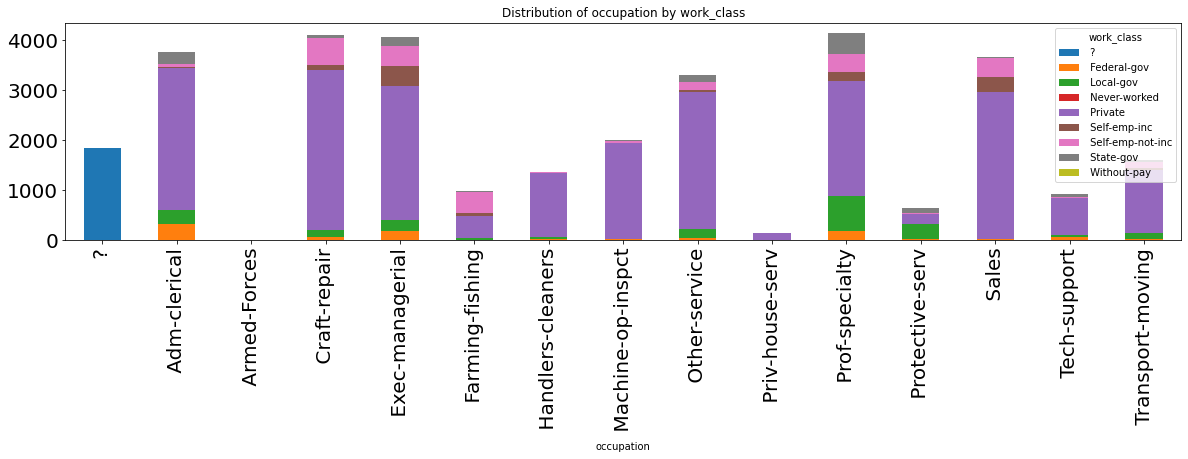

In [29]:
groupby_target_occ = data.groupby(['occupation', 'work_class'])['occupation'].count().unstack('work_class')
groupby_target_occ.plot.bar(title ='Distribution of occupation by work_class', stacked=True, figsize = (20,4));

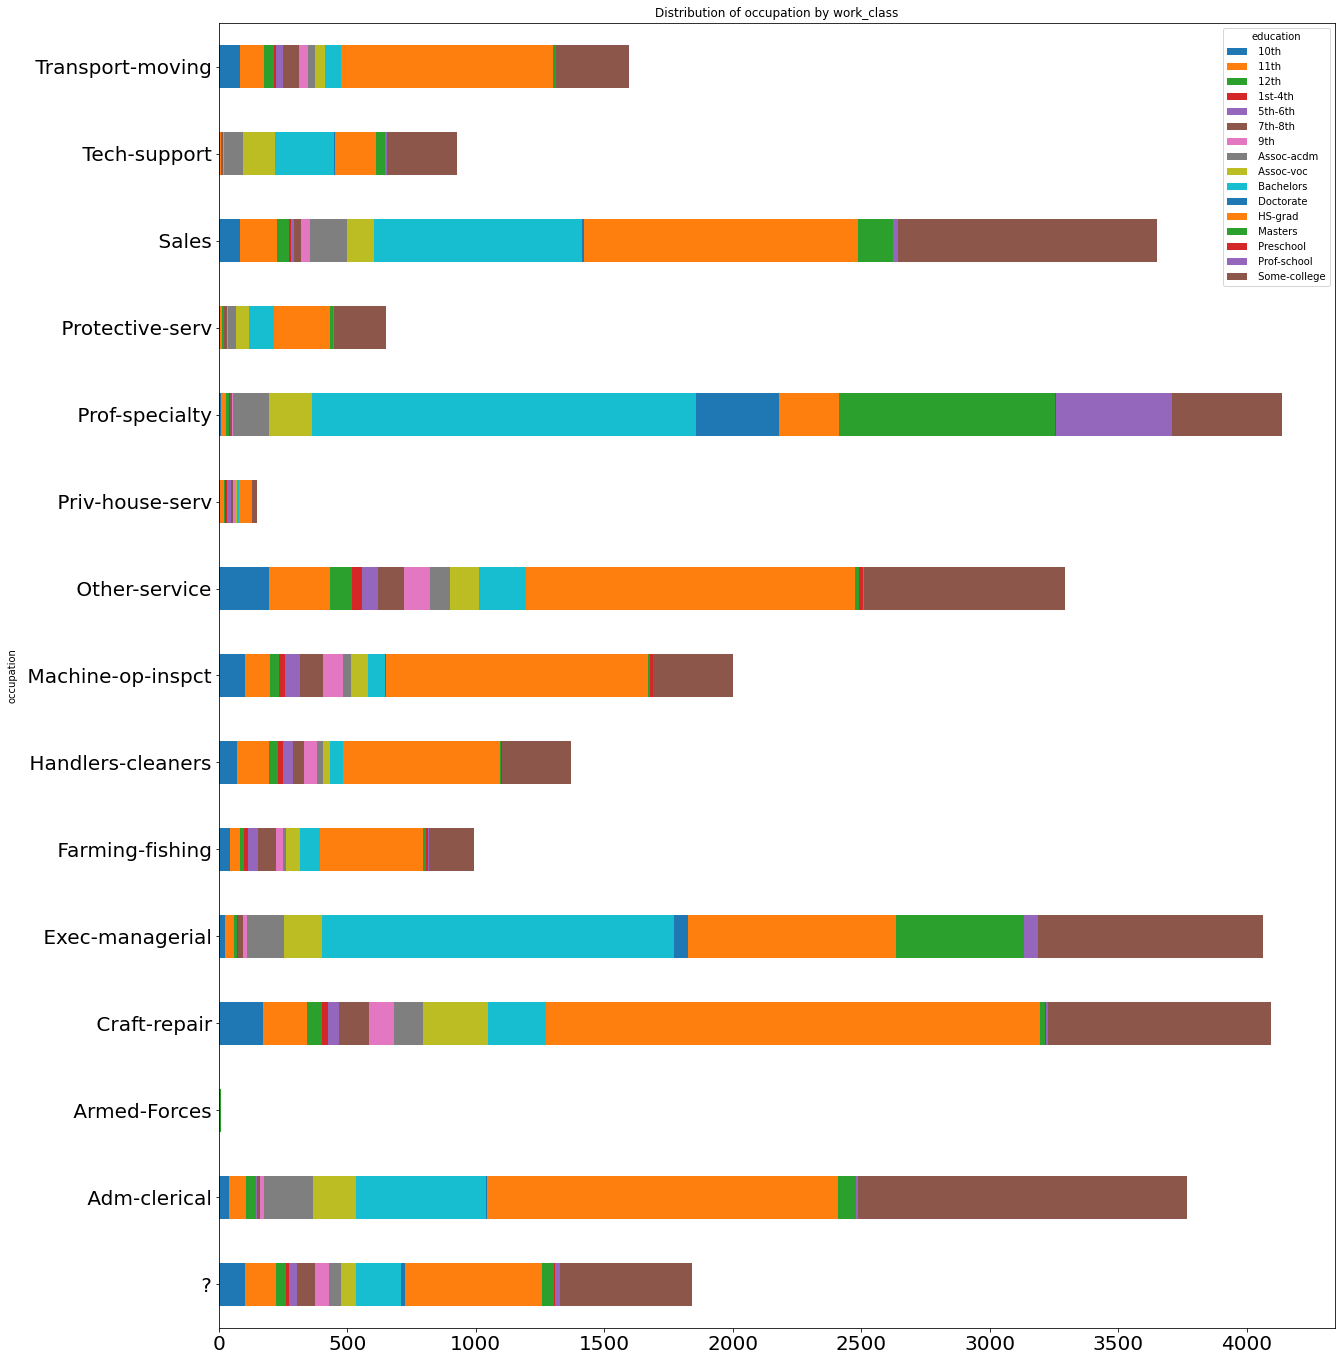

In [30]:
groupby_target_occ = data.groupby(['occupation','education'])['occupation'].count().unstack(['education'])
groupby_target_occ.plot.barh(title ='Distribution of occupation by work_class', stacked=True, figsize = (20,24));

<AxesSubplot:title={'center':'Distribution of work class for 40 hours per week'}, xlabel='work_class'>

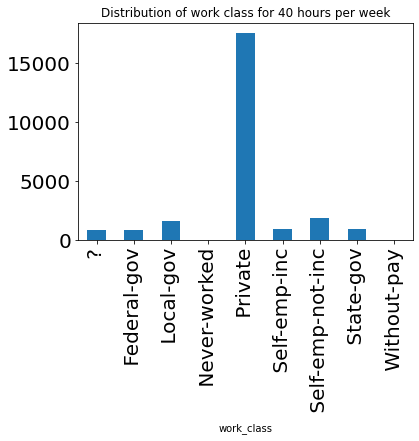

In [31]:
#Confirming that most people that work greater than or equal 40 hours per week worked privately
data_40_hours_per_week = data[(data.hours_per_week >= 40)]
groupby_work_class_40_hours_per_week = data_40_hours_per_week.groupby('work_class').size()
groupby_work_class_40_hours_per_week.plot.bar(title = 'Distribution of work class for 40 hours per week')

<AxesSubplot:title={'center':'Distribution of target for private_work_class'}, xlabel='target'>

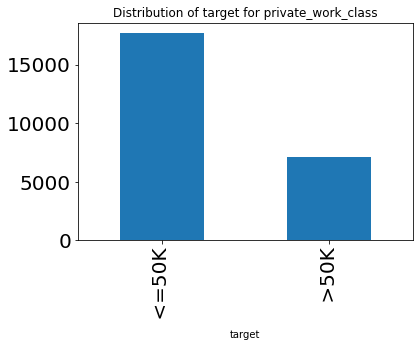

In [32]:
#Confirming that most people that privately earn below 50k 
data_private_work_class = data[(data.work_class == ' Private')]
groupby_target_private_work_class = data_40_hours_per_week.groupby('target').size()
groupby_target_private_work_class.plot.bar(title = 'Distribution of target for private_work_class')

<AxesSubplot:title={'center':'Distribution of education'}, xlabel='education'>

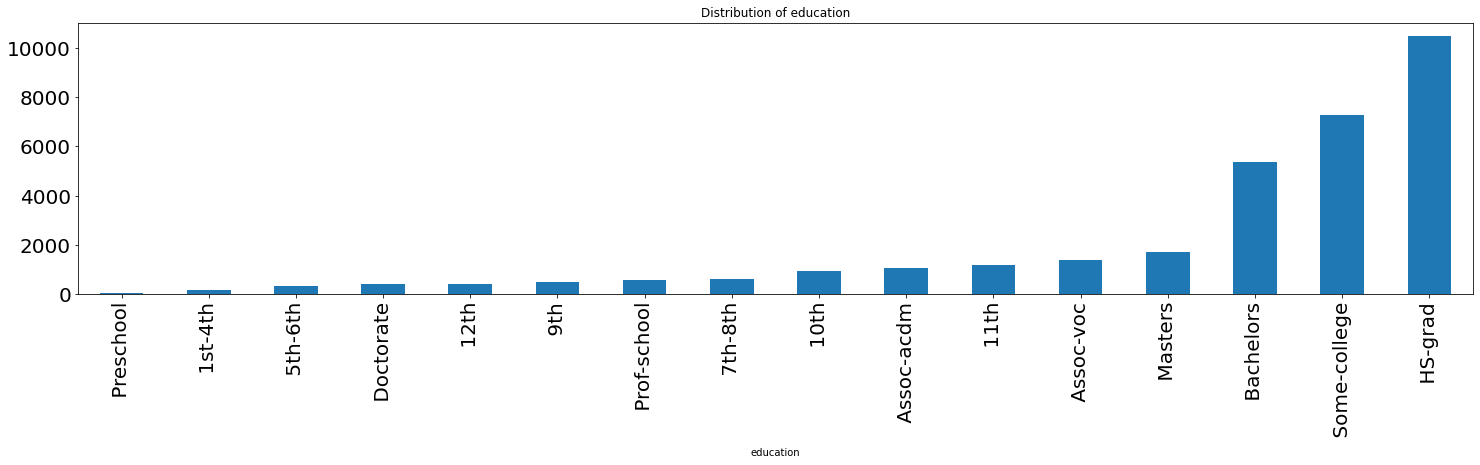

In [33]:
#Most earner are bachelor , high school, or some college graduates
groupby_education = data.groupby('education').size().sort_values()
plt.figure(figsize=(25,5))
groupby_education.plot.bar(title ='Distribution of education')

<AxesSubplot:title={'center':'Distribution of education'}, xlabel='education_num'>

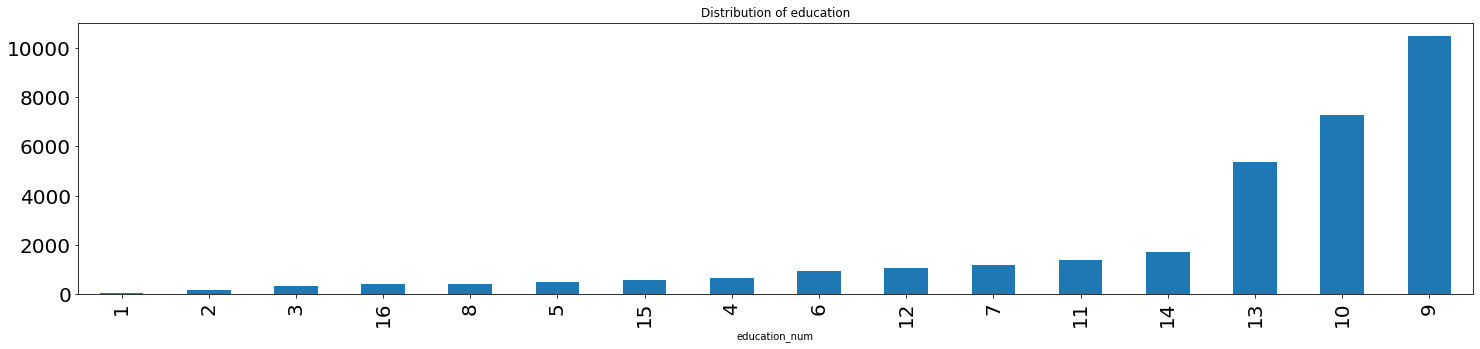

In [34]:
#Most earner are bachelor , high school, or some college graduates
groupby_education = data.groupby('education_num').size().sort_values()
plt.figure(figsize=(25,5))
groupby_education.plot.bar(title ='Distribution of education')

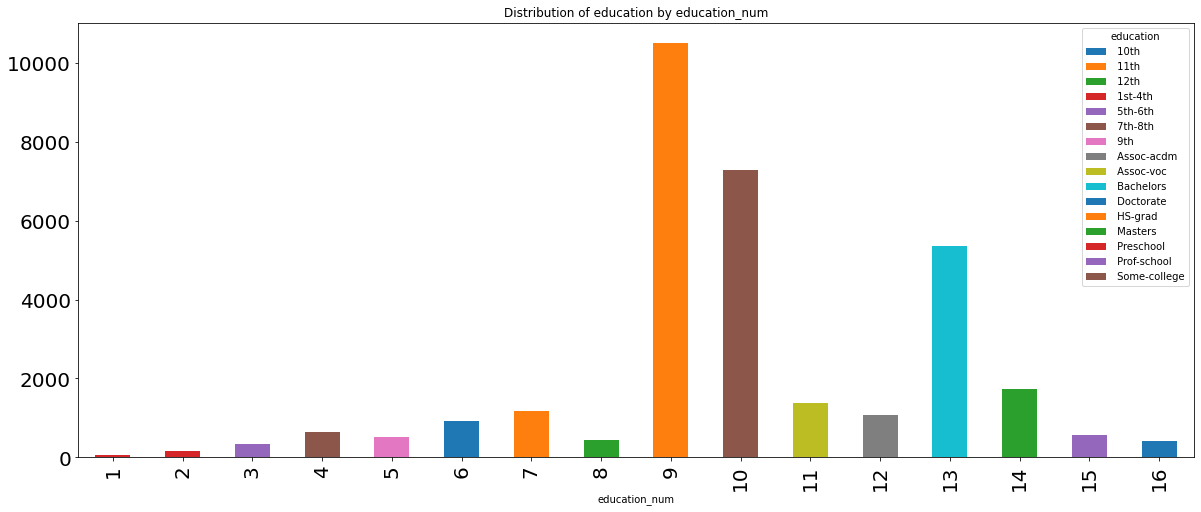

In [35]:
groupby_target_stats = data.groupby(['education_num', 'education'])['education_num'].count().unstack('education')
groupby_target_stats.plot.bar(title ='Distribution of education by education_num', stacked=True, figsize = (20,8));

<AxesSubplot:title={'center':'Distribution of target for hs_bsc_college'}, xlabel='target'>

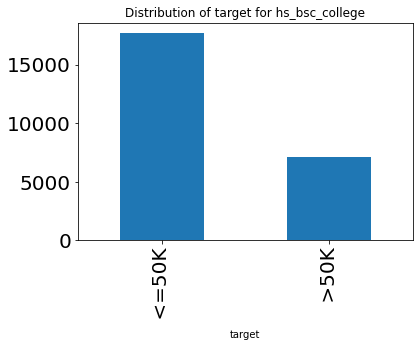

In [36]:
#Confirming that most people that privately earn below 50k 
data_education_hs_bsc_college = data[(data.education == ' Bachelors')|(data.education == ' HS-grad')|(data.education == ' Some-college')]
groupby_target_hs_bsc_college = data_40_hours_per_week.groupby('target').size()
groupby_target_hs_bsc_college.plot.bar(title = 'Distribution of target for hs_bsc_college')

<AxesSubplot:title={'center':'Distribution of target for hs_bsc_college'}, xlabel='hours_per_week'>

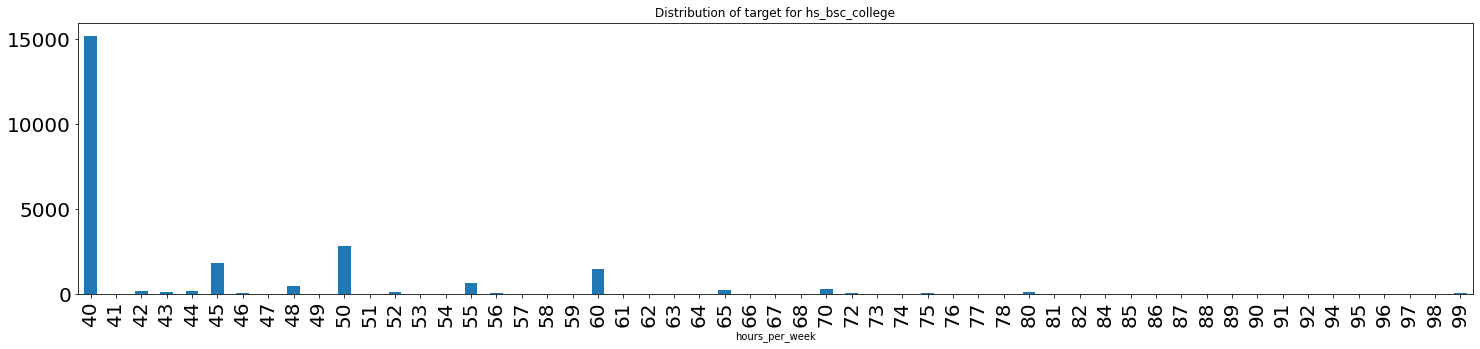

In [37]:
#Confirming that most people that privately earn below 50k 
data_education_hs_bsc_college = data[(data.education == ' Bachelors')|(data.education == ' HS-grad')|(data.education == ' Some-college')]
groupby_target_hs_bsc_college = data_40_hours_per_week.groupby('hours_per_week').size()
plt.figure(figsize=(25,5))
groupby_target_hs_bsc_college.plot.bar(title = 'Distribution of target for hs_bsc_college')

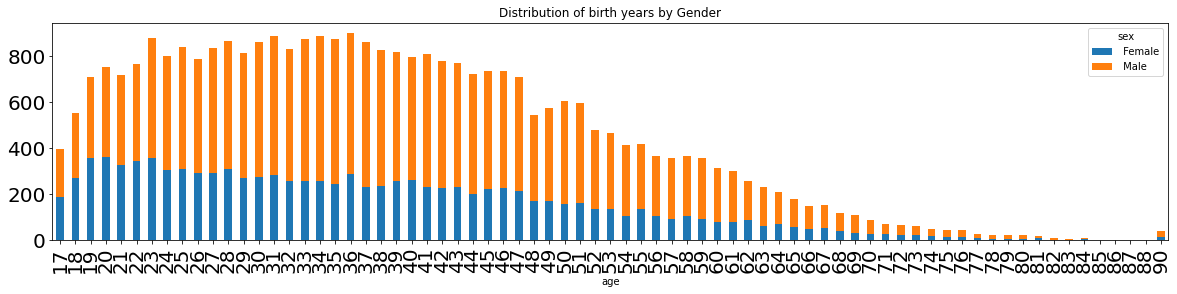

In [38]:
groupby_age_gender = data.groupby(['age', 'sex'])['age'].count().unstack('sex')
groupby_age_gender.plot.bar(title ='Distribution of birth years by Gender', stacked=True, figsize = (20,4));

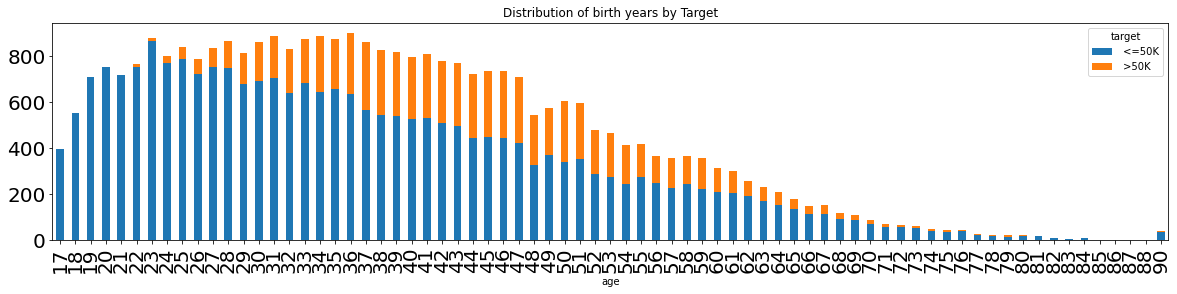

In [39]:
groupby_target_gender = data.groupby(['age', 'target'])['age'].count().unstack('target')
groupby_target_gender.plot.bar(title ='Distribution of birth years by Target', stacked=True, figsize = (20,4));

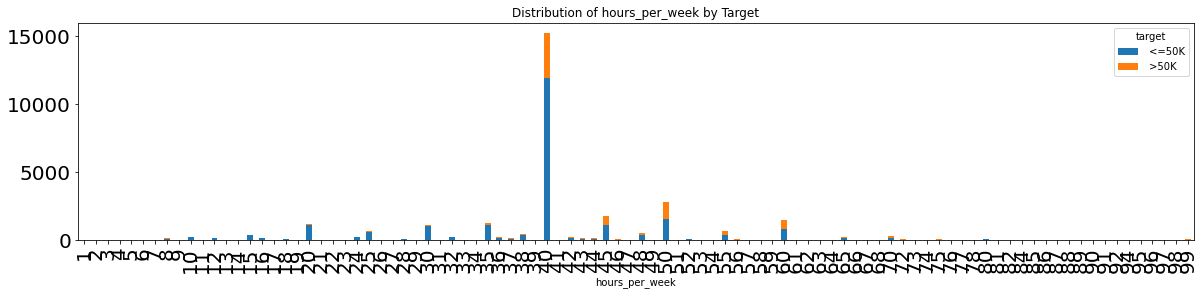

In [40]:
groupby_target_hours = data.groupby(['hours_per_week', 'target'])['hours_per_week'].count().unstack('target')
groupby_target_hours.plot.bar(title ='Distribution of hours_per_week by Target', stacked=True, figsize = (20,4));

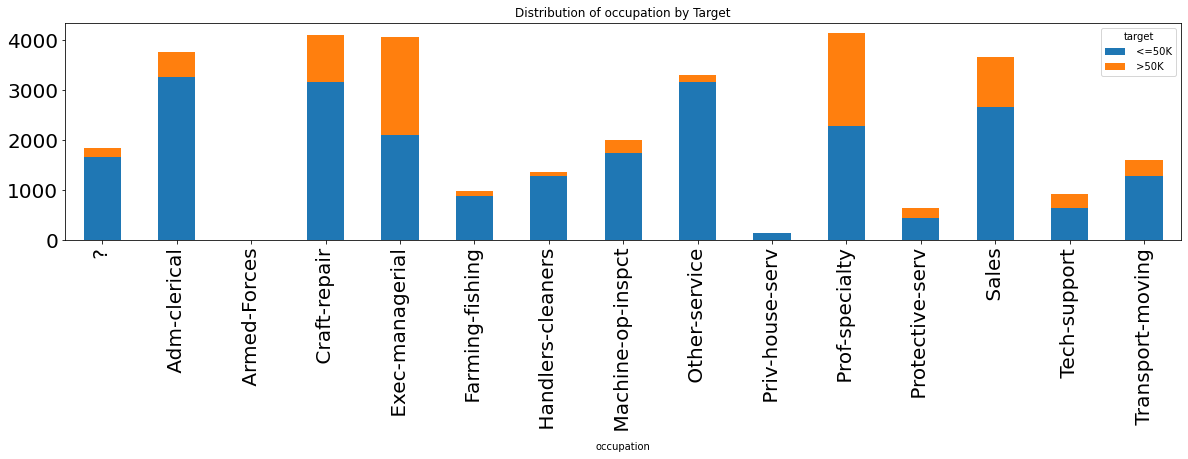

In [41]:
groupby_target_occ = data.groupby(['occupation', 'target'])['occupation'].count().unstack('target')
groupby_target_occ.plot.bar(title ='Distribution of occupation by Target', stacked=True, figsize = (20,4));

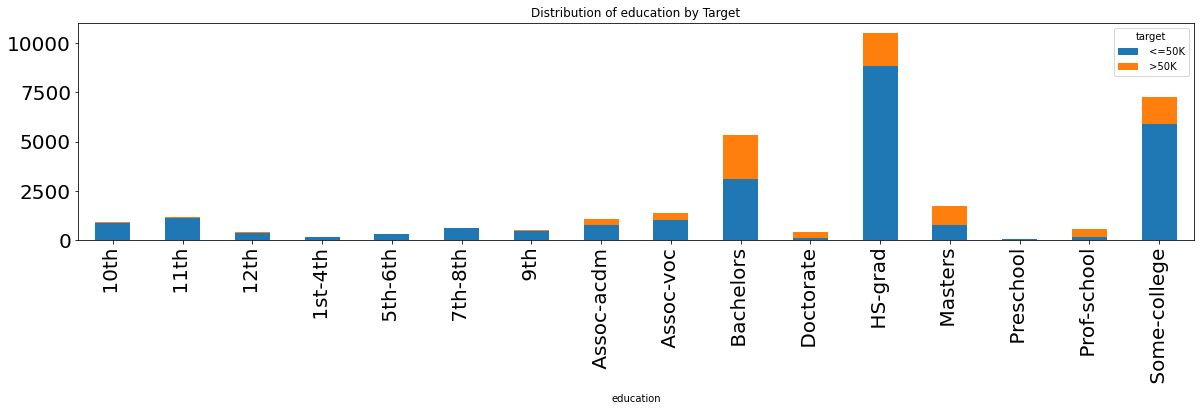

In [42]:
groupby_target_edu = data.groupby(['education', 'target'])['education'].count().unstack('target')
groupby_target_edu.plot.bar(title ='Distribution of education by Target', stacked=True, figsize = (20,4));

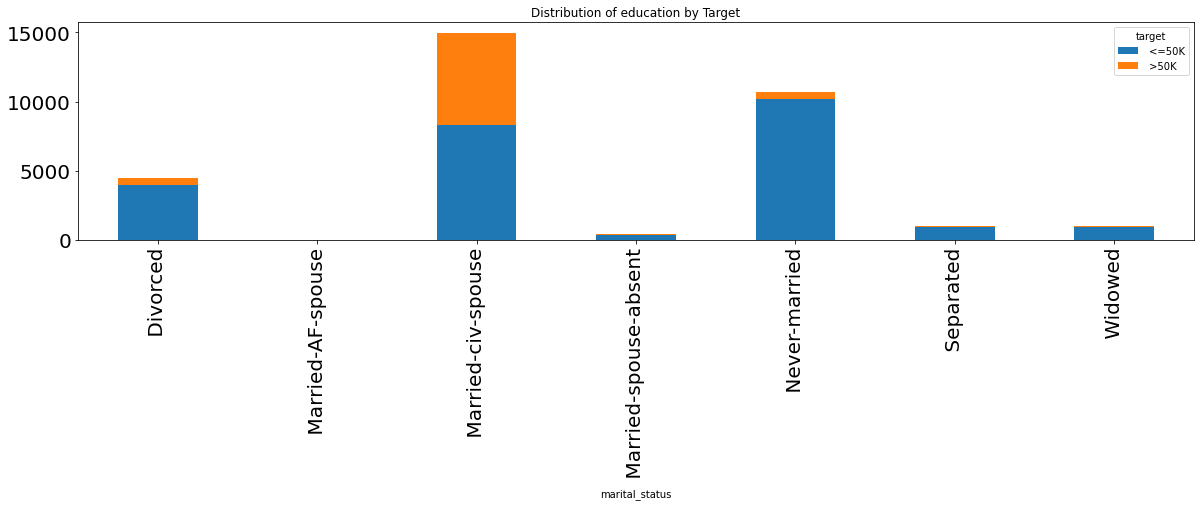

In [43]:
groupby_target_stats = data.groupby(['marital_status', 'target'])['marital_status'].count().unstack('target')
groupby_target_stats.plot.bar(title ='Distribution of education by Target', stacked=True, figsize = (20,4));

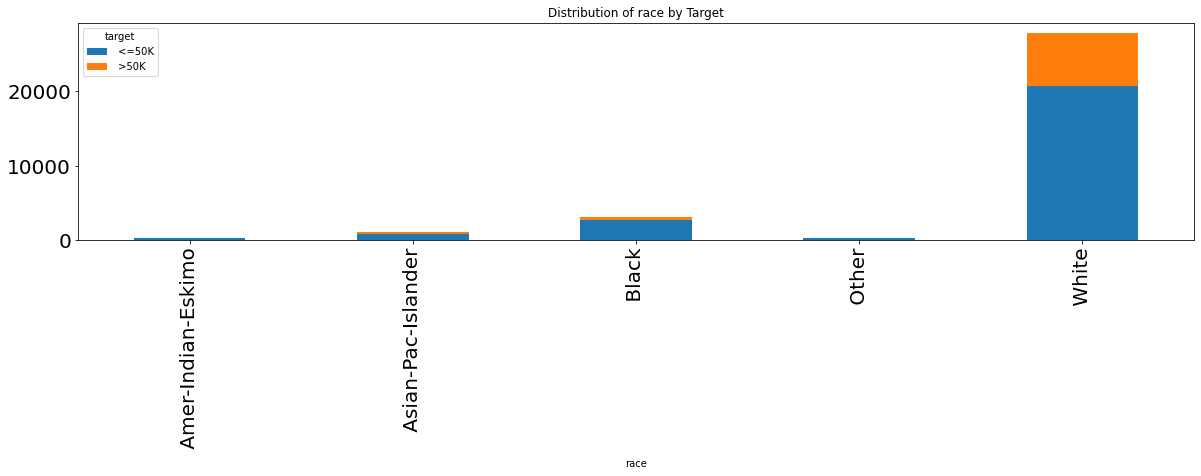

In [44]:
groupby_target_race = data.groupby(['race', 'target'])['race'].count().unstack('target')
groupby_target_race.plot.bar(title ='Distribution of race by Target', stacked=True, figsize = (20,4));

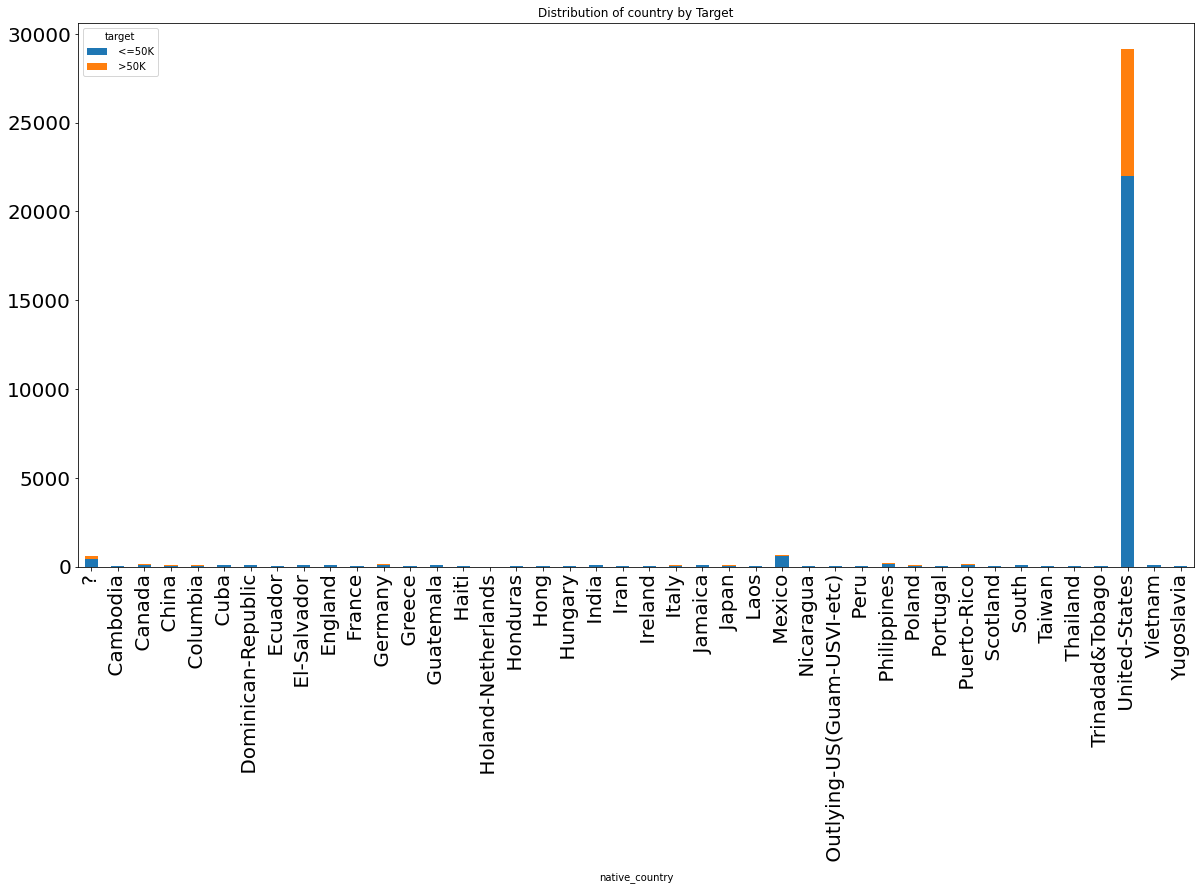

In [45]:
groupby_target_country = data.groupby(['native_country', 'target'])['native_country'].count().unstack('target')
groupby_target_country.plot.bar(title ='Distribution of country by Target', stacked=True, figsize = (20,10));

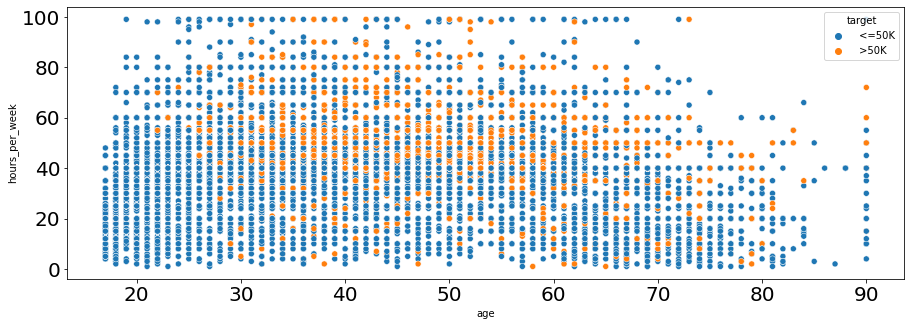

In [46]:
plt.figure(figsize=(15,5))
sns.scatterplot(data=data,x = 'age',y='hours_per_week',hue='target');


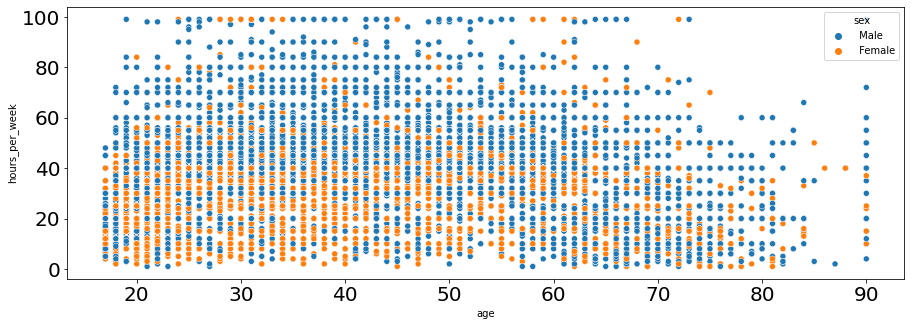

In [47]:
plt.figure(figsize=(15,5))
sns.scatterplot(data=data,x = 'age',y='hours_per_week',hue='sex');

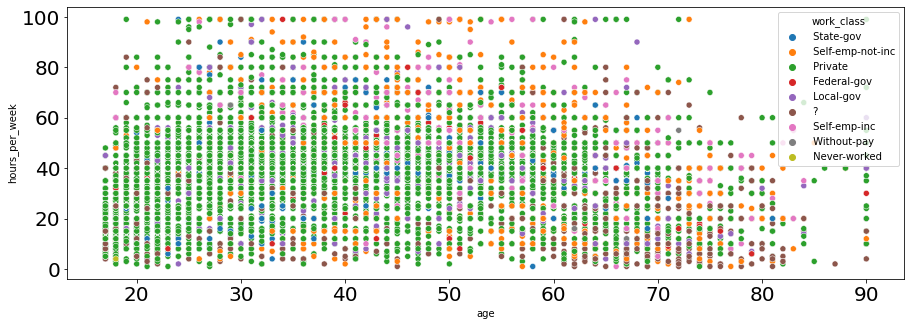

In [48]:
plt.figure(figsize=(15,5))
sns.scatterplot(data=data,x = 'age',y='hours_per_week',hue='work_class');

**CONCLUSION FROM THE DATA VISUALIZATION ANALYSIS**

1. A Large percentage of the earners are males with almost twice the size of females.
2. A Large percentage of the earners are from the Whites, followed by black which is about one tenth of the white.
3. A Large percentage of the earners are between the age of 18 and 50, it makes sense since they are in the dependent labor class.
4. A large percentage of people that earn below 50k are those between 18 and 60.
5. A large percentage of earners are EXEC_MANEGERIAL,CRAFT_REPAIR AND PROF_SPECIALITY occupation.
6. A Large percentage of earners are Married civ spouse, Never Married and Divorced and it is highly correlated with relationship features
7. A Large percentage of earner came from the United-States and it's evident since most are from the white race with few been from the black race.
8. A large percentage of earners work for 40 hours per week, following it is 60, 45 ,35.
9. A large percentage of earners who work for 40 hours earns less than 50k and are mostly males.
10. Capital gain and capital loss doesnt seem like a useful feature so WE WILL DROP THEM.
11. A Large percentage of earners are private workers and 
12. A large percentage of earners who work for 40 hours per week are private workers.
13. A Large percentage of earner are bachelor, high school,or some college graduates and most of them earn below 50K
14. As the Age decreased, the proportion of female earners reduced with respect to the male gender
15. No signicant number earner earned more than 50K until the age of 22 and it also reduced as the age decreased i.e no signiifcant number of earner below 70 years earned above 50k relative to less than 50k.
16. Only  40,45,50 hours per week significant number of earners earns above 50k.
17. A significant number of earners with above 50k salary comes from Craft-repair,Exec-Managerial,Prof-Specialty,Sales.
18. Only HS-grad,Some college,Bachelors,Masters has a significant number of greater than 50k earner.
19. Married-civ-spouse really had a high amount of greater than 50k earner compared to the latter.

# DATA ANALYSIS BY CROSS TABULATION AND GROUPBY TO FIND RELATIONSHIP BETWEEN TARGET AND INDEPENDENT FEATURES

### **1. AGE**

In [49]:
# AGE AND TARGET
data[['age','target']].groupby('target').mean()

,age
target,
<=50K,36.787392
>50K,44.250925


In [50]:
# AGE AND TARGET
data[['age','target']].groupby('target').quantile([0.25,0.5,0.75,0.99])

age
target           
 <=50K 0.25  25.0
       0.50  34.0
       0.75  46.0
       0.99  74.0
 >50K  0.25  36.0
       0.50  44.0
       0.75  51.0
       0.99  71.0

## **2. HOURS_PER_WEEK**

In [51]:
# HOURS_PER_WEEK AND TARGET
data[['hours_per_week','target']].groupby('target').mean()

,hours_per_week
target,
<=50K,38.842862
>50K,45.473402


In [52]:
# HOURS_PER_WEEK AND TARGET
data[['hours_per_week','target']].groupby('target').quantile([0.1,0.25,0.5,0.75,0.99])

hours_per_week
target                     
 <=50K 0.10            20.0
       0.25            35.0
       0.50            40.0
       0.75            40.0
       0.99            75.0
 >50K  0.10            40.0
       0.25            40.0
       0.50            40.0
       0.75            50.0
       0.99            80.0

## **3. WORK_CLASS**

In [53]:
# WORKCLASS AND TARGET
pd.crosstab(data.target,data.work_class)

work_class,?,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay
target,,,,,,,,,
<=50K,1645,589,1476,7,17712,494,1816,945,14
>50K,191,371,617,0,4961,622,724,353,0


## **4. MARITAL_STATUS**

In [54]:
# MARITAL_STATUS AND TARGET
pd.crosstab(data.target,data.marital_status)

marital_status,Divorced,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed
target,,,,,,,
<=50K,3978,13,8280,384,10176,959,908
>50K,463,10,6690,34,491,66,85


In [55]:
# RELATIONSHIP AND TARGET
pd.crosstab(data.target,data.relationship)

relationship,Husband,Not-in-family,Other-relative,Own-child,Unmarried,Wife
target,,,,,,
<=50K,7271,7436,944,4997,3227,823
>50K,5916,856,37,67,218,745


## **5. OCCUPATION**

In [56]:
# OCCUPATION AND TARGET
pd.crosstab(data.target,data.occupation)

occupation,?,Adm-clerical,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving
target,,,,,,,,,,,,,,,
<=50K,1652,3261,8,3165,2097,877,1283,1751,3154,146,2278,438,2667,644,1277
>50K,191,507,1,929,1968,115,86,249,137,1,1858,211,983,283,320


## **6. EDUCATION AND EDUCATION_NUM**

In [57]:
# EDUCATION AND TARGET
pd.crosstab(data.target,data.education)

education,10th,11th,12th,1st-4th,5th-6th,7th-8th,9th,Assoc-acdm,Assoc-voc,Bachelors,Doctorate,HS-grad,Masters,Preschool,Prof-school,Some-college
target,,,,,,,,,,,,,,,,
<=50K,871,1115,400,160,316,605,487,802,1021,3132,107,8820,763,50,153,5896
>50K,62,60,33,6,16,40,27,265,361,2221,306,1674,959,0,423,1386


In [58]:
# EDUCATION_NUM AND TARGET
pd.crosstab(data.target,data.education_num)

education_num,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
target,,,,,,,,,,,,,,,,
<=50K,50,160,316,605,487,871,1115,400,8820,5896,1021,802,3132,763,153,107
>50K,0,6,16,40,27,62,60,33,1674,1386,361,265,2221,959,423,306


## **7. SEX**

In [59]:
# SEX AND TARGET
pd.crosstab(data.target,data.sex)

sex,Female,Male
target,,
<=50K,9583,15115
>50K,1179,6660


## **8. NATIVE COUNTRY**

In [60]:
# NATIVE_COUNTRY AND TARGET
pd.crosstab(data.target,data.native_country)

native_country,?,Cambodia,Canada,China,Columbia,Cuba,Dominican-Republic,Ecuador,El-Salvador,England,...,Portugal,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia
target,,,,,,,,,,,,,,,,,,,,,
<=50K,436,12,82,55,57,70,68,24,97,60,...,33,102,9,64,31,15,17,21984,62,10
>50K,146,7,39,20,2,25,2,4,9,30,...,4,12,3,16,20,3,2,7169,5,6


## **9. RACE**

In [61]:
# RACE AND TARGET
pd.crosstab(data.target,data.race)

race,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White
target,,,,,
<=50K,275,762,2735,246,20680
>50K,36,276,387,25,7115


**CONCLUSION FROM THE ANALYSIS BY CROSS TABULATION**

1. We notice that the mean of the age of <=50k class is less than that of the >50k, not showing enough insights, we check for the quartile for 0.25,0.50,0.75,0.99, we would see that age is not highly correlated with the target but can also be a feature that aids in prediction of the target as it is uniformly distributed with the target class.
2. We also notice that the mean of the hours_per week of <=50k class is less than that of the >50k, not showing enough insights also like the age feature,we check for the quartile for 0.1,0.25,0.50,0.75,0.99, we would see that hours_per_week is has a lesser value for those with <=50k class than for those with >50k class, we can conclude that the >50k class has most of those who worked for 40 hours or more than the <=50k. (FAIRLY CORRELATED).

**WHAT WE WILL DO:**
> **TASK**

>1. We drop the capital_gain,capital_loss,relationship,education_num,fnlgwt.
>2. We replace the extra whitespace in front of each value in the dataframe.
>3. We categorize the marital_status as married which contains(married-civ) and not married which contains(married-af_spouse,divorced,seperated,widowed,married_spouse_absent).
>4. We categorize education as first_class(preschool,1-12th grade),second_class(HS-grad,prof_school),third_school(some_college,assoc_acd,assoc_voc),fourth(Bachelor,Masters,Doctorate)
>5. We categorize native country as United_states including the missing values and Foreign_countries.
>6. We categorize races as White,Black and the other races(Not_white_nor_black).
>7. We categorize occupation- '?' as unknown,(Adm-clerical,Exec-managerial,Sales) as Administrative,(Craft-repair,Prof-specialty,Farming-fishing,Tech-support) as Skill,Other-service as Others,Armed-Forces as No_job,(Machine-op-inspct,Transport-moving,Handlers-cleaners,Protective-serv,Priv-house-serv).
>8. We categorize Work_class- '?' as Unknown, Private as Private,(state,local,federal) as Government,(Never_worked,Without_pay) as Non_earner,(Self-emp-not-inc,Self-emp-inc) as self_employed.


## DATA WRANGLING

WE NEED TO WRANGLE THE DATA USING THE 'WHAT TO DO' HEADING FOR MORE FEATURE EXPLORATION : STATISTICAL TEST,PAIRPLOT,HEATMAP.

**TASK 1**

In [62]:
#we drop the redundant columns
redundant_col_dropped = data.drop(['capital_gain','capital_loss','education_num','fnlgwt','relationship'],axis=1)

In [63]:
redundant_col_dropped.head()

,index,age,work_class,education,marital_status,occupation,race,sex,hours_per_week,native_country,target
0,0,39,State-gov,Bachelors,Never-married,Adm-clerical,White,Male,40,United-States,<=50K
1,1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,White,Male,13,United-States,<=50K
2,2,38,Private,HS-grad,Divorced,Handlers-cleaners,White,Male,40,United-States,<=50K
3,3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Black,Male,40,United-States,<=50K
4,4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Black,Female,40,Cuba,<=50K


**TASK 2**

In [64]:
#We remove the whitespaces in the beginning of each values so as to ease computation.
redundant_col_format_dropped = redundant_col_dropped.copy()
pattern = '\A\s'
replace = ''
for col in redundant_col_dropped.select_dtypes(include='object').columns:
    redundant_col_format_dropped.loc[:,col]=redundant_col_dropped.loc[:,col].apply(lambda string : re.sub(pattern,replace,str(string)))

In [65]:
redundant_col_format_dropped_encode = redundant_col_format_dropped.copy()

**TASK 3**

In [66]:
for marital_col_id in range(len(redundant_col_format_dropped['marital_status'])):
    if ((redundant_col_format_dropped.loc[marital_col_id,'marital_status'] == 'Married-civ-spouse')|
        (redundant_col_format_dropped.loc[marital_col_id,'marital_status'] == 'Married-AF-spouse')):
        redundant_col_format_dropped_encode.loc[marital_col_id,'marital_status'] = 'Married'
    else:
        redundant_col_format_dropped_encode.loc[marital_col_id,'marital_status'] = 'Not_married'

**TASK 4**

In [67]:
education_list = np.unique(redundant_col_format_dropped.education)
redundant_col_format_dropped_encode.education.replace({education_list[0]:'First_Grade',education_list[1]:'First_Grade',education_list[2]:'First_Grade',education_list[3]:'First_Grade',education_list[4]:'First_Grade',
                                                       education_list[5]:'First_Grade',education_list[6]:'First_Grade',education_list[7]:'Third_Grade',education_list[8]:'Third_Grade', education_list[9]:'Fourth_Grade',
                                                       education_list[10]:'Fourth_Grade',education_list[11]:'Second_Grade',education_list[12]:'Fourth_Grade',education_list[13]:'First_Grade',education_list[14]:'Second_Grade',education_list[15]:'Third_Grade'},
                                                      inplace=True)

**TASK 5**

In [68]:
for country_col_id in range(len(redundant_col_format_dropped_encode['native_country'])):
    if (redundant_col_format_dropped_encode.loc[country_col_id,'native_country'] == 'United-States'):
        redundant_col_format_dropped_encode.loc[country_col_id,'native_country'] = 'Citizens'
    else:
        redundant_col_format_dropped_encode.loc[country_col_id,'native_country'] = 'Foreigners'

**TASK 6**

In [69]:
for race_col_id in range(len(redundant_col_format_dropped_encode['race'])):
    if ((redundant_col_format_dropped_encode.loc[race_col_id,'race'] == 'white')|(redundant_col_format_dropped_encode.loc[race_col_id,'race'] == 'Black')):
        pass
    else:
        redundant_col_format_dropped_encode.loc[race_col_id,'race'] = 'Other_race'

**TASK 7**

In [70]:
#performing task 3
occ_list = np.unique(redundant_col_format_dropped.occupation)
redundant_col_format_dropped_encode.occupation.replace({occ_list[0]:'Unknown',occ_list[1]:'Administrative',occ_list[2]:'No_job',occ_list[3]:'Skill',occ_list[4]:'Administrative',occ_list[5]:'Skill',occ_list[6]:'Worker',occ_list[7]:'Worker',
                                                        occ_list[8]:'Other',occ_list[9]:'Worker',occ_list[10]:'Skill',occ_list[11]:'Worker',occ_list[12]:'Administrative',occ_list[13]:'Skill',occ_list[14]:'Worker'},inplace=True)

**TASK 8**

In [71]:
#performing task 4
work_class_list = np.unique(redundant_col_format_dropped.work_class)
redundant_col_format_dropped_encode.work_class.replace({work_class_list[0]:'Unknown',work_class_list[1]:'Government',work_class_list[2]:'Government',work_class_list[3]:'Non_earner',work_class_list[4]:'Private',
                                                        work_class_list[5]:'Employed',work_class_list[6]:'Employed',work_class_list[7]:'Government',work_class_list[8]:'Non_earner'},inplace=True)

In [72]:
redundant_col_format_dropped_encode.head()

,index,age,work_class,education,marital_status,occupation,race,sex,hours_per_week,native_country,target
0,0,39,Government,Fourth_Grade,Not_married,Administrative,Other_race,Male,40,Citizens,<=50K
1,1,50,Employed,Fourth_Grade,Married,Administrative,Other_race,Male,13,Citizens,<=50K
2,2,38,Private,Second_Grade,Not_married,Worker,Other_race,Male,40,Citizens,<=50K
3,3,53,Private,First_Grade,Married,Worker,Black,Male,40,Citizens,<=50K
4,4,28,Private,Fourth_Grade,Married,Skill,Black,Female,40,Foreigners,<=50K


***we encode each categorical feature to make possible plotting of heatmap and pairplot***


In [73]:
redundant_col_format_dropped_encoded = redundant_col_format_dropped_encode.copy()

In [74]:
cat_col = redundant_col_format_dropped_encoded.select_dtypes(include='object').columns
redundant_col_format_dropped_encoded[cat_col] = redundant_col_format_dropped_encoded[cat_col].astype('category')

In [75]:
for col in redundant_col_format_dropped_encoded.select_dtypes(include='category').columns:
    redundant_col_format_dropped_encoded.loc[:,col]=redundant_col_format_dropped_encoded.loc[:,col].cat.codes

1. Nominal class: work_class,marital_status,race,sex,occupation,native_country.
2. Ordinal: Education
3.  Numerical features: age,hours_per_week

**HEATMAP**

In [76]:
redundant_col_format_dropped_encoded.corr(method='kendall')['target'].sort_values()

marital_status   -0.445202
work_class       -0.136437
occupation       -0.087307
education        -0.053262
native_country   -0.034206
index             0.004432
race              0.089107
sex               0.215969
age               0.225180
hours_per_week    0.238267
target            1.000000
Name: target, dtype: float64

<AxesSubplot:>

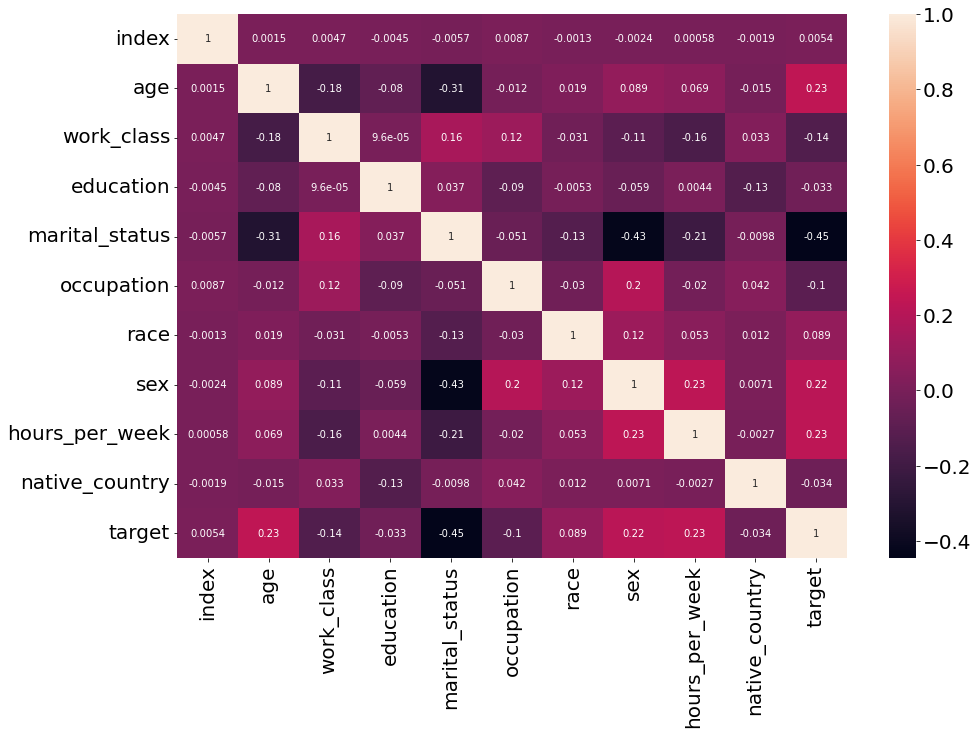

In [101]:
plt.figure(figsize=(15,10))
sns.heatmap(redundant_col_format_dropped_encoded.corr(),annot=True)

**SCATTERPLOT**

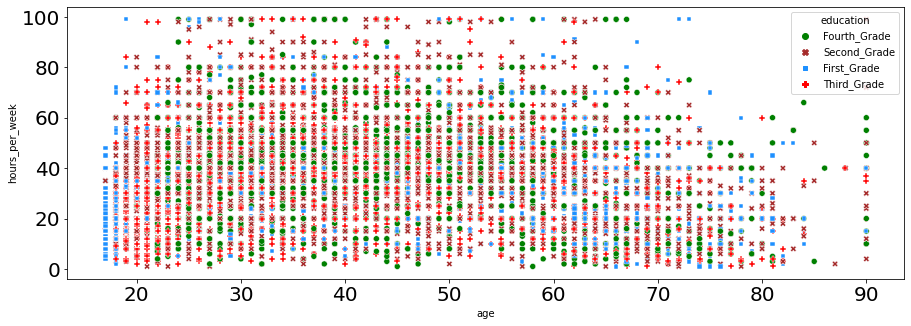

In [78]:
plt.figure(figsize=(15,5))
sns.scatterplot(data= redundant_col_format_dropped_encode,x='age',y='hours_per_week',hue='education',style='education',palette=['green','brown','dodgerblue','red']);


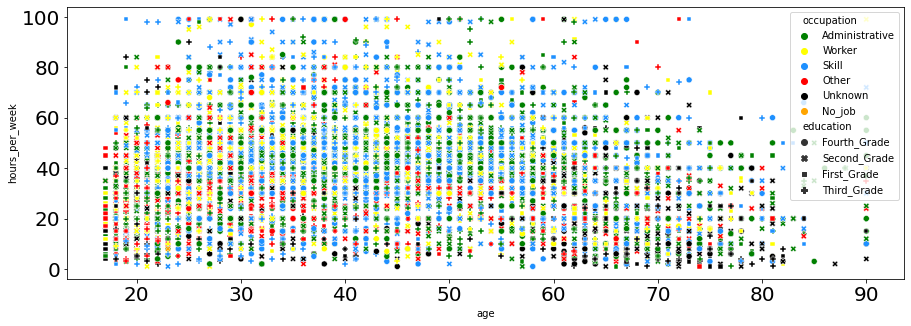

In [79]:
plt.figure(figsize=(15,5))
sns.scatterplot(data= redundant_col_format_dropped_encode,x='age',y='hours_per_week',hue='occupation',style='education',palette=['green','yellow','dodgerblue','red','black','orange']);


In [80]:
#sns.pairplot(redundant_col_format_dropped_encode,hue='target',markers=['o','s']);

# DATA PREPROCESSING

In [81]:
data_preprocess = redundant_col_format_dropped_encoded.copy()

### 1. DATA CLEANING

**A. Identify Columns That Contain a Single Value**

In [82]:
single_val_col_list = [col for col in data_preprocess.columns if len(data_preprocess[col].unique())==1]
single_val_col_list

[]

**B. Identify Columns That Contain very few Values**

In [83]:
# We will consider numerical col with few values, also keep in mind the size of the dataset
# We will be using 0.01% as our bench mark
few_val_col_list = [col for col in data_preprocess.select_dtypes(['int','float']).columns if float(len(data_preprocess[col].unique())/len(data_preprocess[col]))*100<0.01]
few_val_col_list

[]

In [84]:
#First we identify if there are duplicates
data_preprocess.duplicated().value_counts()
#Then we drop duplicate rows
#data_preprocess = data_preprocess[~data_preprocess.duplicated()]

False    32537
dtype: int64

**C. Identify Outliers**

**1. For age**

In [85]:
mean = np.mean(data.age)
std = np.std(data.age)
lower = mean - 3*(std)
upper = mean + 3*(std)
outliers = [x for x in data.age if x < lower or x > upper]
len(outliers)

120

**The plot belows shows that there is a pattern in the outliers so we would not drop it as it could reduce model performance**

<AxesSubplot:xlabel='target', ylabel='work_class'>

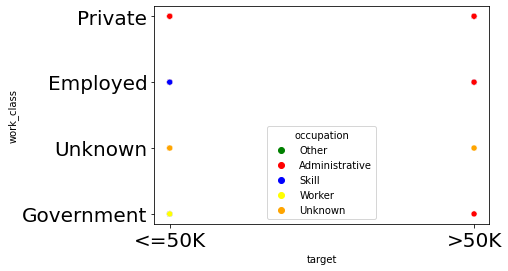

In [93]:
sns.scatterplot(data =redundant_col_format_dropped_encode[redundant_col_format_dropped_encode.age>80],x='target',y='work_class',hue='occupation',palette=['green','red','blue','yellow','orange'])

In [87]:
mean = np.mean(data.hours_per_week)
std = np.std(data.hours_per_week)
lower = mean - 3*(std)
upper = mean + 3*(std)
hours_outliers = [x for x in data.age if x < lower or x > upper]
len(hours_outliers)

165

In [88]:
max(hours_outliers),min(hours_outliers)

(90, 78)

**Since hours_per_week has a relativelt fair correlation with the target, it wont be dropped and most likely be scaled using an algorithm robust to outliers**

<AxesSubplot:xlabel='target', ylabel='occupation'>

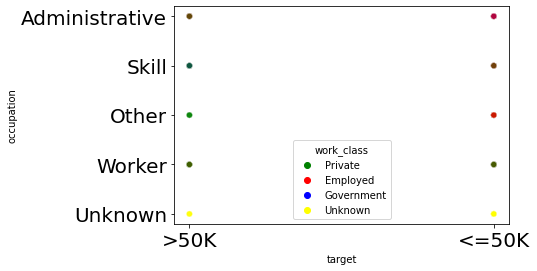

In [100]:
sns.scatterplot(data =redundant_col_format_dropped_encode[redundant_col_format_dropped_encode.hours_per_week>78],x='target',y='occupation',hue='work_class',alpha=0.5,palette=['green','red','blue','yellow'])

**D. MISSING VALUES**